<a href="https://colab.research.google.com/github/sokrypton/ColabDesign/blob/main/tr/design.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TrDesign in JAX!
Backprop through TrRosetta for protein design.

In [1]:
#@title install
%%bash
if [ ! -d params/tr ]; then
  # get code
  pip -q install git+https://github.com/sokrypton/ColabDesign.git

  # for debugging
  ln -s /usr/local/lib/python3.7/dist-packages/colabdesign colabdesign

  # download params
  mkdir -p params/tr
  wget -qnc https://files.ipd.uw.edu/krypton/TrRosetta/models.zip -P params/tr/
  wget -qnc https://files.ipd.uw.edu/krypton/TrRosetta/bkgr_models.zip -P params/tr/
  unzip -qqo params/tr/models.zip -d params/tr/
  unzip -qqo params/tr/bkgr_models.zip -d params/tr/
  rm params/tr/models.zip 
  rm params/tr/bkgr_models.zip
fi

In [2]:
#@title setup
from colabdesign import mk_trdesign_model, clear_mem

from google.colab import files
import os
import numpy as np

def get_pdb(pdb_code=""):
  if pdb_code is None or pdb_code == "":
    upload_dict = files.upload()
    pdb_string = upload_dict[list(upload_dict.keys())[0]]
    with open("tmp.pdb","wb") as out: out.write(pdb_string)
    return "tmp.pdb"
  else:
    os.system(f"wget -qnc https://files.rcsb.org/view/{pdb_code}.pdb")
    return f"{pdb_code}.pdb"

#fixbb

In [3]:
clear_mem()
tr_model = mk_trdesign_model(protocol="fixbb")
tr_model.prep_inputs(get_pdb("6MRR"), chain="A")

In [12]:
tr_model.restart()
tr_model.set_opt(hard=False)
tr_model.design(50, verbose=10, save_best=False)
tr_model.set_opt(hard=True)
tr_model.design(50, verbose=10, save_best=True)

10 [3] {'cce': 2.5427818298339844}
20 [4] {'cce': 1.9268395900726318}
30 [0] {'cce': 1.283845067024231}
40 [4] {'cce': 1.1842379570007324}
50 [1] {'cce': 1.2048310041427612}
60 [1] {'cce': 1.2398115396499634}
70 [1] {'cce': 1.248685598373413}
80 [1] {'cce': 1.2778639793395996}
90 [1] {'cce': 1.2607343196868896}
100 [3] {'cce': 1.2603700160980225}


In [13]:
print(tr_model.get_loss())
print(tr_model.get_seq())

{'cce': 1.1873592138290405}
EKNPKVKEIVKEFNMMMRQYGMPGFTFERTGGTCVITFPKLSPMMRNFLNEVQQELQEEGCKITVEIP


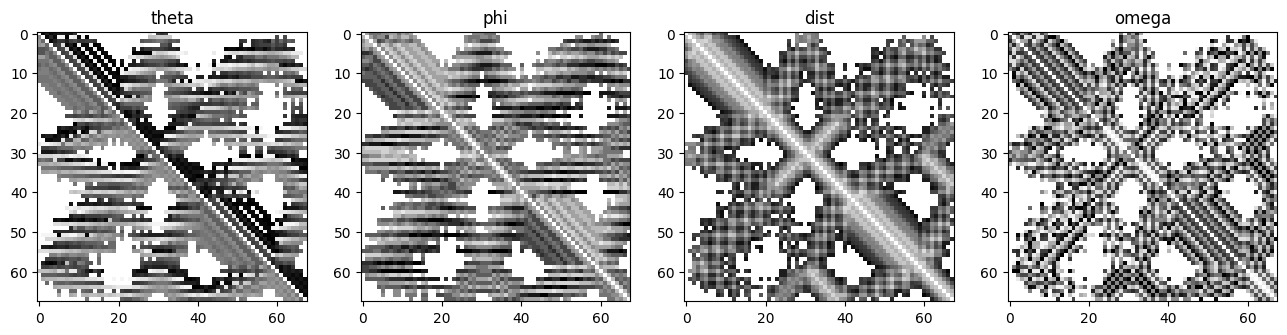

In [17]:
tr_model.plot("preds")

#Hallucination

In [18]:
clear_mem()
tr_model = mk_trdesign_model(protocol="hallucination")
tr_model.prep_inputs(length=100)

In [34]:
tr_model.restart()
tr_model.set_opt(hard=False)
tr_model.design(50, verbose=10, save_best=False)
tr_model.set_opt(hard=True)
tr_model.design(50, verbose=10, save_best=True)

10 [3] {'bkg': -0.8963674902915955}
20 [4] {'bkg': -0.9751476645469666}
30 [0] {'bkg': -1.0059038400650024}
40 [3] {'bkg': -1.0039186477661133}
50 [1] {'bkg': -1.0172427892684937}
60 [3] {'bkg': -0.9481927156448364}
70 [0] {'bkg': -0.9752465486526489}
80 [1] {'bkg': -0.9602535367012024}
90 [4] {'bkg': -0.964923620223999}
100 [3] {'bkg': -0.9683818817138672}


In [35]:
print(tr_model.get_loss())
print(tr_model.get_seq())

{'bkg': -0.986676037311554}
CRPCRNMCEMLVDMAENIKDIAESISSMAQMLANEAWQSGDPDDAPKAQKEAQEFSNKAMELSNQAQKLKDKAEDLRDEAKKCRDQCVRDPDDPNMCRCD


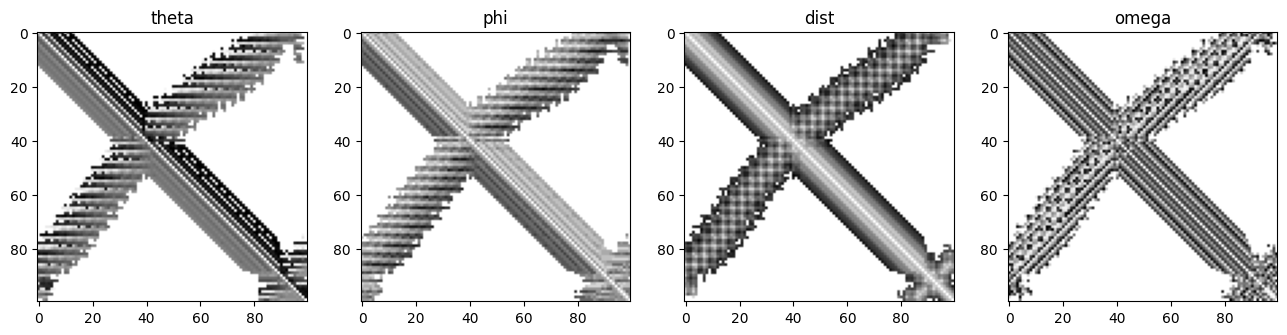

In [36]:
tr_model.plot("preds")